# Features That Increased The Chances of Getting a Loan
## by: David Akuffo-Boateng

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

>In this investigation, I looked at features that increased the chances of getting a loan. I focused primarily on the following variables; ProsperRating (Alpha), LoanOriginalAmount, DebtToIncomeRatio, IncomeRange, MonthlyLoanPayment, StatedMonthlyIncome, LoanOriginationDate, EmploymentStatus, IsBorrowerHomeowner, IncomeVerifiable, Term and ListingCategory. 

> After a thorough analysis, it was seen that, a borrower must be employed or worked full-time, have a low debt to income ratio and have a monthly income of not less than 5000USD, which are the features that increase the chances of getting a loan.


## Dataset Overview
> Prosper Loans is a Carlifornia-based peer-to-peer lending platform, where individuals can either invest in personal loans or request to borrow money. The dataset consisted of 113,937 loans with 81 variables. I investigated the features that increased the chances of getting a loan. Since management of Prosper started to introduce some variables from July 2009, it was prudent to filter our features of interest from July 1, 2009. This will do away with bias and give us more accurate insights from our features of interest.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [5]:
# convert LoanOriginationDate datatype to datetime
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

In [6]:
# filter loans from July 1, 2009
new_loans = loans.query('LoanOriginationDate >= "2009-07-01" ')

In [7]:
# create a new categories for the new dataset
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'EmploymentStatus': ['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not available'],
                   'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999',  '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'Term': [12, 36, 60]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    new_loans[var] = loans[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## ProsperRating (Alpha) by EmploymentStatus

> Borrowers who were employed were the majority of people who went in for loans, and most of these had an appreciable prosper rating, with C-rating having the largest borrowers.

Text(0.5, 1.0, 'Employment Status by Prosper Rating')

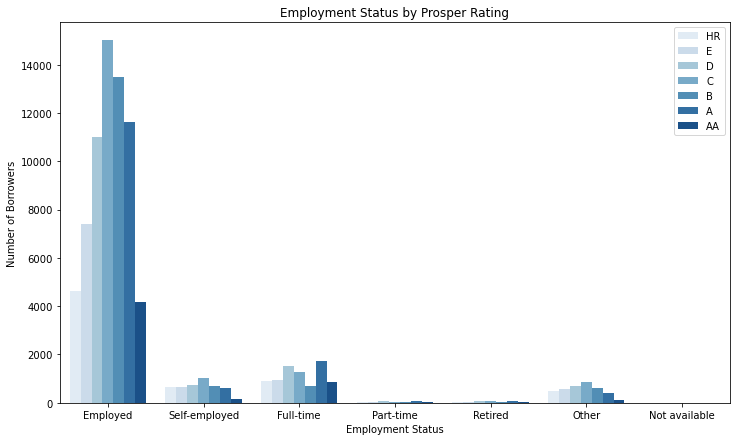

In [9]:
# ProsperRating vs EmploymentStatus
plt.figure(figsize = [12,7])
g = sb.countplot(data = new_loans, hue = 'ProsperR palette = 'Blues')
g.legend(loc = 1)
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers')
plt.title('Employment Status by Prosper Rating')

## ProsperRating (Alpha) by StatedMonthlyIncome
> There's a trend of borrowers' monthly increasing as the ratings get higher. Thus, the larger a borrower's monthly income, the higher the prosper rating and chance of getting a loan. 

Text(0.5, 1.0, 'Prosper Rating by Stated Monthly Income')

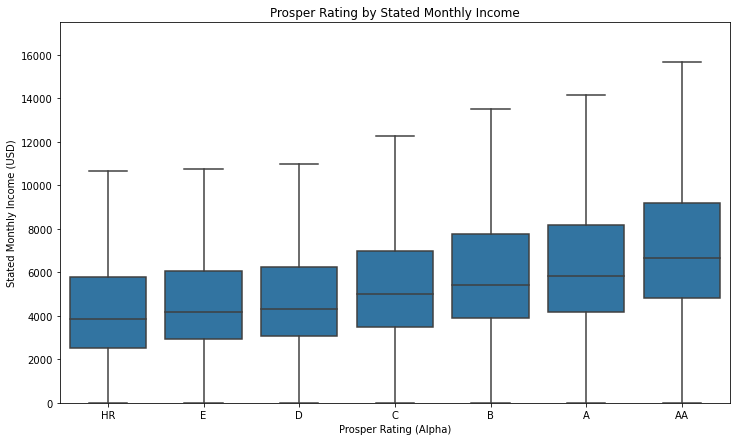

In [26]:
# ProsperRating vs StatedMonthlyIncome
plt.figure(figsize = [12,7])
base_color = sb.color_palette()[0]
sb.boxplot(data = new_loans, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = base_color, showfliers = False)
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Stated Monthly Income (USD)')
plt.ylim(0,17500)
plt.title('Prosper Rating by Stated Monthly Income')

## ProsperRating (Alpha) by EmploymentStatus and StatedMonthlyIncome

> Borrowers who were employed and worked full-time had larger montly income and higher ratings than the other employment statuses. The minimum monthly income for an employed borrower was $5000.

Text(0.5, 1.0, 'Prosper Rating by Employment Status and Stated Monthly Income')

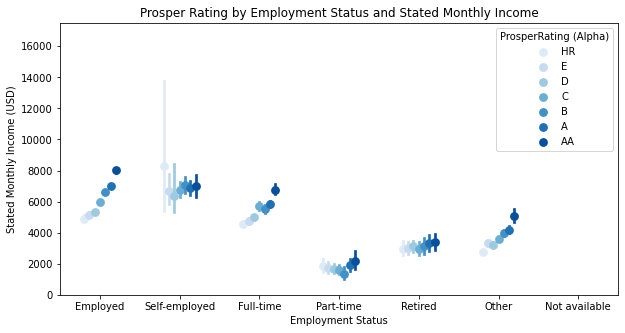

In [27]:
plt.figure(figsize = [10,5])
sb.pointplot(data = new_loans, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.ylim(0, 17500)
plt.xlabel('Employment Status')
plt.ylabel('Stated Monthly Income (USD)')
plt.title('Prosper Rating by Employment Status and Stated Monthly Income')

## ProsperRating by DebtToIncomeRatio
> It is clearly indicated that as the ratings gets higher, the debt to income ratio gets lower; meaning borrowers who had low debt to income ratio had the better chance of getting a loan, as there's a less risk of giving out loans to such borrowers.

Text(0.5, 1.0, 'Prosper Rating by Debt To Income Ratio')

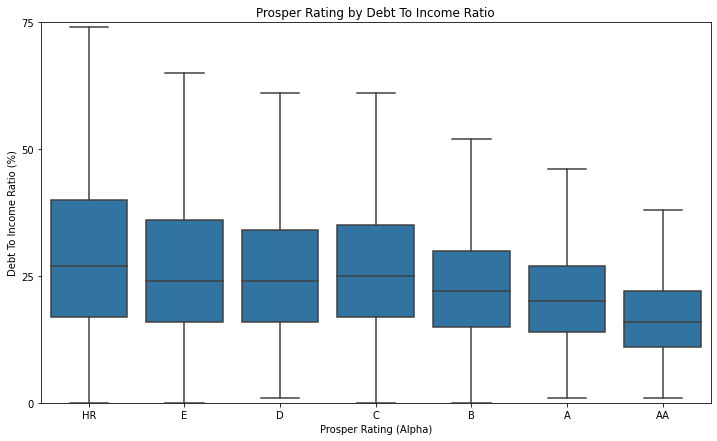

In [20]:
# ProsperRating vs DebtToIncomeRatio
plt.figure(figsize = [12,7])
sb.boxplot(data = new_loans, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', color = base_color, showfliers = False)
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Debt To Income Ratio (%)')
plt.ylim(0,0.75)
plt.yticks([0.00, 0.25, 0.50, 0.75], [0, 25, 50, 75])
plt.title('Prosper Rating by Debt To Income Ratio')

## ProsperRating by DebtToIncomeRatio and EmplymentStatus
> Both borrowers who are employed or worked full-time had the lowest debt-to-income ratio across the types of employment status. It can also be seen that borrowers who were under the afore-mentioned types of employment status had higher prosper rating having the lowest debt-to-income ratio.

Text(0.5, 1.0, 'Prosper Rating by Debt To Income Ratio and Stated Monthly Income')

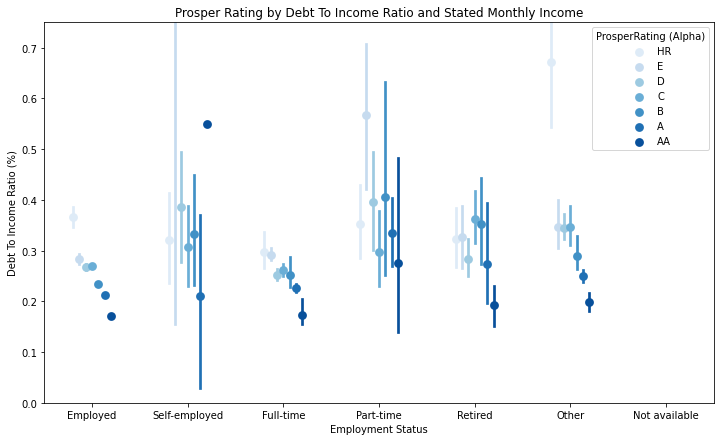

In [29]:
plt.figure(figsize = [12,7])
sb.pointplot(data = new_loans, x = 'EmploymentStatus', y = 'DebtToIncomeRatio', hue = 'ProsperRating (Alpha)', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.ylim(0, 0.75)
plt.xlabel('Employment Status')
plt.ylabel('Debt To Income Ratio (%)')
plt.title('Prosper Rating by Debt To Income Ratio and Stated Monthly Income')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 